# DATASCIENCE CHALLENGE

## The data set (attached) from Movielens consists of 105,339 ratings applied over 10,329 movies.

## 1. Generate a graph of movies per genre.
## 2. Generate another graph for the genres with the highest rating.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.getrecursionlimit()

3000

In [3]:
sys.setrecursionlimit(150000)

In [4]:
os.getcwd()

'C:\\Users\\reuben.amofah'

In [5]:
os.chdir('C:/Users/reuben.amofah/Desktop/Datascience/Codewit/Assignments')

### Importing 'movies' dataset and examining the features.

In [6]:
data1 = pd.read_csv(r'movies.csv')
data1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [7]:
data1.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [8]:
data1.tail(10)

,movieId,title,genres
10319,144482,Circle (2015),Drama|Horror|Sci-Fi
10320,144656,The Measure of a Man (2015),Drama
10321,144976,Bone Tomahawk (2015),Horror|Western
10322,146344,Elämältä kaiken sain ( ),Comedy|Drama
10323,146656,Creed (2015),Drama
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


### A list of the different movie genres per the data

In [9]:
data1.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [10]:
data1.genres.value_counts().head(20)

Drama                          1385
Comedy                          826
Comedy|Drama                    465
Drama|Romance                   421
Comedy|Romance                  363
Documentary                     300
Comedy|Drama|Romance            286
Drama|Thriller                  212
Crime|Drama                     188
Horror                          170
Crime|Drama|Thriller            163
Horror|Thriller                 152
Drama|War                       146
Thriller                        106
Comedy|Crime                     92
Action|Comedy                    77
Action|Crime|Thriller            75
Action|Crime|Drama|Thriller      69
Action|Thriller                  69
Action|Drama                     67
Name: genres, dtype: int64

## Data cleaning and Feature engineering of dataset to enhance analysis. 

### Renaming the 'genres' column as 'sub-genres' and grouping them into main genre categories as 'genres' to make graph plotting effective.

In [11]:
data1.rename(columns = {'genres' :'sub_genres'}, inplace =True)
data1

,movieId,title,sub_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [12]:
def genre_groupings(x):
    if x[0:4] == 'Adve':
        return 'Adventure'
    elif x[0:4] =='Adul':
        return 'Adult'    
    elif x[0:4] =='Acti':
        return 'Action'
    elif x[0:4] =='Anim':
        return 'Animation'
    elif x[0:4] =='Biop':
        return 'Biopioc'
    elif x[0:4] =='Chil':
        return 'Children'
    elif x[0:4] =='Crim':
        return 'Crime'   
    elif x[0:4] =='Come':
        return 'Comedy'
    elif x[0:4] =='Docu':
        return 'Documentary'
    elif x[0:4] =='Dram':
        return 'Drama'
    elif x[0:4] =='Horr':
        return 'Horror'
    elif x[0:4] =='Fami':
        return 'Family'
    elif x[0:4] =='Fant':
        return 'Fantasy'
    elif x[0:4] =='Film':
        return 'Film-Noir'
    elif x[0:4] =='Hist':
        return 'Historical'
    elif x[0:4] =='Medi':
        return 'Medical'
    elif x[0:4] =='Musi':
        return 'Musical'
    elif x[0:4] =='Myst':
        return 'Mystery'
    elif x[0:4] =='Para':
        return 'Paranormal'
    elif x[0:4] =='Roma':
        return 'Romance'
    elif x[0:4] =='Spor':
        return 'Sport'
    elif x[0:4] =='Scie':
        return 'Science fiction'
    elif x[0:4] =='Talk':
        return 'Talk show'
    elif x[0:4] =='Thri':
        return 'Thriller'
    elif x[0:4] =='West':
        return 'Western'  
    elif x[0:3] =='Sci':
        return 'Science fiction'
    elif x[0:3] =='War':
        return 'War'
    else:
        return np.NaN

In [13]:
data1['genres'] = data1['sub_genres'].apply(genre_groupings)
data1

,movieId,title,sub_genres,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,Animation
10325,146878,Le Grand Restaurant (1966),Comedy,Comedy
10326,148238,A Very Murray Christmas (2015),Comedy,Comedy
10327,148626,The Big Short (2015),Drama,Drama


In [14]:
data1.replace({'genres':'-'},' ',regex=True,inplace=True)

### A list of the main genre  categories ( as derived from the sub-genre categories) to be used in plotting the graphs.

In [15]:
data1['genres'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film Noir', 'Romance', 'Science fiction',
       'Musical', 'War', nan], dtype=object)

### Checking for rows(movies) with no sub-genre and genre listings and deleting them.

In [16]:
data1['genres'].isnull().sum()

7

In [17]:
data1.dropna(inplace=True)


In [18]:
data1['genres'].isnull().sum()

0

## 1. Generate a graph of movies per genre.

### Checking for the various genre categories with their respective number of movies and plotting them in descending order.

In [19]:
movies_per_genre = data1['genres'].value_counts().head(20)
movies_per_genre

Drama              2838
Comedy             2719
Action             1737
Crime               757
Adventure           617
Horror              503
Documentary         360
Children            175
Animation           174
Thriller            113
Western              66
Mystery              56
Science fiction      51
Romance              46
Fantasy              43
Musical              32
Film Noir            25
War                  10
Name: genres, dtype: int64

In [20]:
df_movies = pd.DataFrame(movies_per_genre)
df_movies.sort_values(by=['genres'], inplace =True)
df_movies

,genres
War,10
Film Noir,25
Musical,32
Fantasy,43
Romance,46
Science fiction,51
Mystery,56
Western,66
Thriller,113
Animation,174


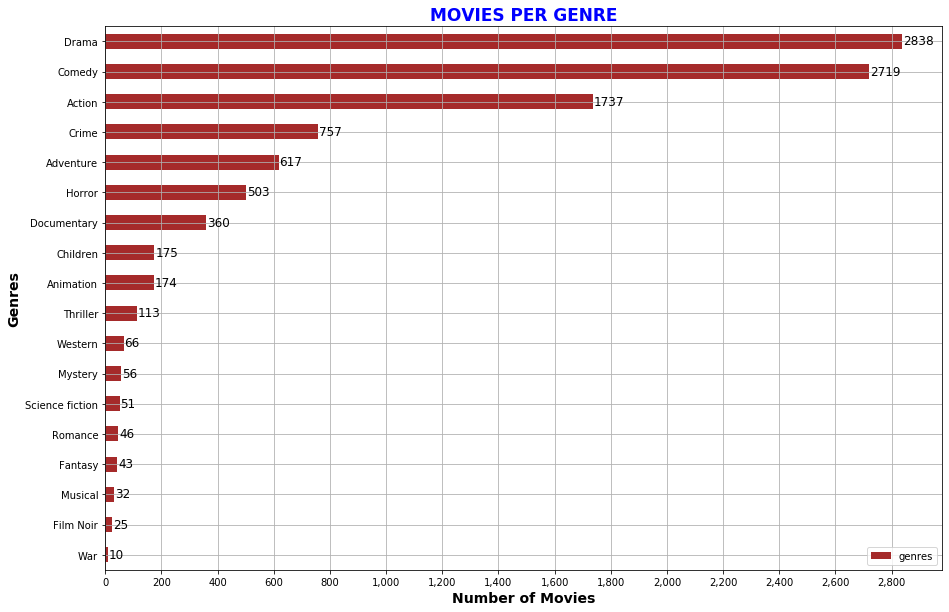

In [21]:
plt.rcParams['figure.figsize'] =(15,10)

df_movies.plot.barh(color='brown')
ax = plt.gca()
plt.xticks(np.arange(0,3000,200))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x),',')))

plt.title('MOVIES PER GENRE',fontweight='bold',fontsize=17,color='blue')

ys=[10,25,32,43,46,51,56,66,113,174,175,360,503,617,757,1737,2719,2838]
for i,v in enumerate (ys):
    ax.text(v+3,i-.1, str(v), fontsize =12)

plt.ylabel('Genres',fontweight='bold', color='black',fontsize=14)
plt.xlabel('Number of Movies',fontweight='bold', color='black',fontsize=14 )

plt.rc('ytick', labelsize=15)
plt.grid()
plt.legend(loc=4)

plt.savefig('movies_per_genre.png')


## 2. Generate another graph for the genres with highest ratings.

### Importing dataset 2 (ratings-1)

In [22]:
data2 = pd.read_csv(r'ratings-1.csv')
data2

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


### Merging 'ratings-1' and 'movies' dataframes to create a single dataframe containing both 'rating' and 'genres' columns.

In [23]:
data1.columns

Index(['movieId', 'title', 'sub_genres', 'genres'], dtype='object')

In [24]:
data2.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [25]:
all_data = data2.merge(data1, on = 'movieId')
all_data

,userId,movieId,rating,timestamp,title,sub_genres,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,Crime
1,9,16,4.0,842686699,Casino (1995),Crime|Drama,Crime
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama,Crime
3,24,16,4.0,963468757,Casino (1995),Crime|Drama,Crime
4,29,16,3.0,836820223,Casino (1995),Crime|Drama,Crime
...,...,...,...,...,...,...,...
105327,668,138914,2.5,1438641621,The Sorcerers (1967),Horror,Horror
105328,668,140098,2.5,1450415424,Runoff (2015),Drama,Drama
105329,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama,Comedy
105330,668,142488,4.0,1451535844,Spotlight (2015),Thriller,Thriller


In [26]:
all_data.head(10)

,userId,movieId,rating,timestamp,title,sub_genres,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,Crime
1,9,16,4.0,842686699,Casino (1995),Crime|Drama,Crime
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama,Crime
3,24,16,4.0,963468757,Casino (1995),Crime|Drama,Crime
4,29,16,3.0,836820223,Casino (1995),Crime|Drama,Crime
5,31,16,4.0,832397760,Casino (1995),Crime|Drama,Crime
6,47,16,4.0,853361808,Casino (1995),Crime|Drama,Crime
7,60,16,4.0,1162941904,Casino (1995),Crime|Drama,Crime
8,62,16,4.5,1267576909,Casino (1995),Crime|Drama,Crime
9,88,16,3.5,1180879072,Casino (1995),Crime|Drama,Crime


In [27]:
all_data.tail(10)

,userId,movieId,rating,timestamp,title,sub_genres,genres
105322,668,132961,3.0,1449418929,Far from the Madding Crowd (2015),Drama,Drama
105323,668,133583,3.0,1435891577,Bessie (2015),Drama,Drama
105324,668,134204,2.5,1437328505,A Hard Day (2014),Action|Crime|Thriller,Action
105325,668,134881,3.0,1447644996,Love & Mercy (2015),Drama,Drama
105326,668,136890,4.0,1436068929,Eastern Boys (2014),Drama,Drama
105327,668,138914,2.5,1438641621,The Sorcerers (1967),Horror,Horror
105328,668,140098,2.5,1450415424,Runoff (2015),Drama,Drama
105329,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama,Comedy
105330,668,142488,4.0,1451535844,Spotlight (2015),Thriller,Thriller
105331,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama,Drama


### Grouping all movies according to their genres and finding the average rating per genre.

In [28]:
genre_group = all_data.groupby('genres')
genre_group

In [29]:
for genre,movies in genre_group:
    print(genre)
    
    print(movies,'\n')

Action
        userId  movieId  rating   timestamp                        title  \
753          1      110     4.0  1217896150            Braveheart (1995)   
754          5      110     0.5  1303501027            Braveheart (1995)   
755          9      110     3.0   842686309            Braveheart (1995)   
756         17      110     1.5  1359557048            Braveheart (1995)   
757         24      110     5.0   963469788            Braveheart (1995)   
...        ...      ...     ...         ...                          ...   
105231     668   108864     2.0  1403887993  Prey, The (La proie) (2011)   
105272     668   114033     2.5  1433450330        Into the Storm (2014)   
105295     668   120400     2.0  1424719010             Free Ride (2013)   
105319     668   132796     2.0  1445087628           San Andreas (2015)   
105324     668   134204     2.5  1437328505            A Hard Day (2014)   

                   sub_genres  genres  
753          Action|Drama|War  Action  


### Finiding average rating for the genre, 'Action'.

In [30]:
genre_action=genre_group.get_group('Action')
genre_action

,userId,movieId,rating,timestamp,title,sub_genres,genres
753,1,110,4.0,1217896150,Braveheart (1995),Action|Drama|War,Action
754,5,110,0.5,1303501027,Braveheart (1995),Action|Drama|War,Action
755,9,110,3.0,842686309,Braveheart (1995),Action|Drama|War,Action
756,17,110,1.5,1359557048,Braveheart (1995),Action|Drama|War,Action
757,24,110,5.0,963469788,Braveheart (1995),Action|Drama|War,Action
...,...,...,...,...,...,...,...
105231,668,108864,2.0,1403887993,"Prey, The (La proie) (2011)",Action|Crime|Thriller,Action
105272,668,114033,2.5,1433450330,Into the Storm (2014),Action|Thriller,Action
105295,668,120400,2.0,1424719010,Free Ride (2013),Action|Drama|Thriller,Action
105319,668,132796,2.0,1445087628,San Andreas (2015),Action|Drama|Thriller,Action


In [31]:
action_rating = genre_action['rating'].mean()
action_rating

3.4514500881269026

### Finiding average rating for the genre, 'Adventure'.

In [32]:
genre_adventure=genre_group.get_group('Adventure')
genre_adventure

,userId,movieId,rating,timestamp,title,sub_genres,genres
1001,1,150,3.0,1217895940,Apollo 13 (1995),Adventure|Drama|IMAX,Adventure
1002,3,150,4.0,841483462,Apollo 13 (1995),Adventure|Drama|IMAX,Adventure
1003,9,150,4.0,842686220,Apollo 13 (1995),Adventure|Drama|IMAX,Adventure
1004,11,150,4.0,850815571,Apollo 13 (1995),Adventure|Drama|IMAX,Adventure
1005,17,150,4.0,1234032960,Apollo 13 (1995),Adventure|Drama|IMAX,Adventure
...,...,...,...,...,...,...,...
105161,668,101025,2.5,1393420594,Jack the Giant Slayer (2013),Adventure|Fantasy|IMAX,Adventure
105200,668,104563,3.0,1377922191,Too Hot to Handle (1938),Adventure|Comedy|Romance,Adventure
105236,668,109237,2.5,1405311175,Bhowani Junction (1956),Adventure|Drama|Romance,Adventure
105245,668,110655,3.0,1421471361,Rio 2 (2014),Adventure|Animation|Children|Comedy,Adventure


In [33]:
adventure_rating = genre_adventure['rating'].mean()
adventure_rating

3.5795092906272457

### Finiding average rating for the genre, 'Animation'.

In [34]:
genre_animation=genre_group.get_group('Animation')
genre_animation

,userId,movieId,rating,timestamp,title,sub_genres,genres
19207,3,595,4.0,841483501,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Animation
19208,5,595,4.0,1303501072,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Animation
19209,28,595,3.0,884100399,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Animation
19210,29,595,3.0,836230758,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Animation
19211,31,595,3.0,832397461,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Animation
...,...,...,...,...,...,...,...
104896,668,81018,2.5,1321981679,"Illusionist, The (L'illusionniste) (2010)",Animation,Animation
104968,668,86604,2.0,1314159951,My Dog Tulip (2009),Animation|Drama,Animation
104973,668,86721,3.0,1373544027,Idiots and Angels (2008),Animation|Drama|Fantasy,Animation
105105,668,95756,3.5,1342849983,"Cat in the Hat, The (1971)",Animation|Children,Animation


In [35]:
animation_rating = genre_animation['rating'].mean()
animation_rating

3.579582366589327

### Finiding average rating for the genre, 'Children'.

In [36]:
genre_children=genre_group.get_group('Children')
genre_children

,userId,movieId,rating,timestamp,title,sub_genres,genres
15696,2,1073,4.0,859046959,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Children
15697,6,1073,5.0,1348693765,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Children
15698,8,1073,5.0,858611351,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Children
15699,11,1073,3.0,850816286,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Children
15700,14,1073,5.0,851766380,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Children
...,...,...,...,...,...,...,...
104354,668,31700,2.0,1144499842,Because of Winn-Dixie (2005),Children|Comedy|Drama,Children
104414,668,34321,3.0,1135437277,Bad News Bears (2005),Children|Comedy,Children
104460,668,42562,2.0,1330322710,Lies My Father Told Me (1975),Children|Drama,Children
104801,668,74089,3.5,1265166146,Peter Pan (1960),Children|Fantasy|Musical,Children


In [37]:
children_rating = genre_children['rating'].mean()
children_rating

3.253200204813108

### Finiding average rating for the genre, 'Comedy'.

In [38]:
genre_comedy=genre_group.get_group('Comedy')
genre_comedy

,userId,movieId,rating,timestamp,title,sub_genres,genres
1489,1,223,4.0,1217897795,Clerks (1994),Comedy,Comedy
1490,3,223,5.0,841483859,Clerks (1994),Comedy,Comedy
1491,9,223,4.0,842686617,Clerks (1994),Comedy,Comedy
1492,17,223,5.0,1350207076,Clerks (1994),Comedy,Comedy
1493,41,223,4.0,1067131891,Clerks (1994),Comedy,Comedy
...,...,...,...,...,...,...,...
105305,668,127124,2.5,1451070026,I'll See You in My Dreams (2015),Comedy|Drama,Comedy
105310,668,129428,2.0,1440267550,The Second Best Exotic Marigold Hotel (2015),Comedy|Drama,Comedy
105311,668,130452,1.0,1436465535,While We're Young (2014),Comedy|Drama,Comedy
105320,668,132800,2.5,1437258304,Welcome to Me (2014),Comedy|Drama,Comedy


In [39]:
comedy_rating = genre_comedy['rating'].mean()
comedy_rating

3.439475881814928

### Finiding average rating for the genre, 'Crime'.

In [40]:
genre_crime=genre_group.get_group('Crime')
genre_crime

,userId,movieId,rating,timestamp,title,sub_genres,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,Crime
1,9,16,4.0,842686699,Casino (1995),Crime|Drama,Crime
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama,Crime
3,24,16,4.0,963468757,Casino (1995),Crime|Drama,Crime
4,29,16,3.0,836820223,Casino (1995),Crime|Drama,Crime
...,...,...,...,...,...,...,...
105290,668,118354,3.0,1428768576,Kill the Messenger (2014),Crime|Drama|Mystery|Thriller,Crime
105299,668,124180,3.0,1436668214,High Wall (1947),Crime|Drama,Crime
105300,668,124320,3.5,1439999265,Once a Thief (1965),Crime|Drama|Thriller,Crime
105301,668,124442,2.5,1451252021,"No God, No Master (2014)",Crime|Drama|Thriller,Crime


In [41]:
crime_rating = genre_crime['rating'].mean()
crime_rating

3.785480706344016

### Finiding average rating for the genre, 'Documentary'.

In [42]:
genre_documentary=genre_group.get_group('Documentary')
genre_documentary

,userId,movieId,rating,timestamp,title,sub_genres,genres
13856,1,45950,0.5,1217897813,"Inconvenient Truth, An (2006)",Documentary,Documentary
13857,63,45950,2.5,1300122377,"Inconvenient Truth, An (2006)",Documentary,Documentary
13858,87,45950,3.5,1173622933,"Inconvenient Truth, An (2006)",Documentary,Documentary
13859,88,45950,4.5,1180999053,"Inconvenient Truth, An (2006)",Documentary,Documentary
13860,137,45950,3.5,1205621165,"Inconvenient Truth, An (2006)",Documentary,Documentary
...,...,...,...,...,...,...,...
105296,668,120478,4.0,1448344546,The Salt of the Earth (2014),Documentary,Documentary
105302,668,126933,2.5,1448851031,These Amazing Shadows (2011),Documentary,Documentary
105306,668,127146,3.0,1433092410,Kurt Cobain: Montage of Heck (2015),Documentary,Documentary
105307,668,127164,4.5,1436668270,"What Happened, Miss Simone? (2015)",Documentary,Documentary


In [43]:
documentary_rating = genre_documentary['rating'].mean()
documentary_rating

3.6518298714144413

### Finiding average rating for the genre, 'Drama'.

In [44]:
genre_drama=genre_group.get_group('Drama')
genre_drama

,userId,movieId,rating,timestamp,title,sub_genres,genres
84,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,Drama
85,27,24,2.0,946233592,Powder (1995),Drama|Sci-Fi,Drama
86,46,24,5.0,954480845,Powder (1995),Drama|Sci-Fi,Drama
87,62,24,2.0,1269754121,Powder (1995),Drama|Sci-Fi,Drama
88,98,24,3.0,955175034,Powder (1995),Drama|Sci-Fi,Drama
...,...,...,...,...,...,...,...
105323,668,133583,3.0,1435891577,Bessie (2015),Drama,Drama
105325,668,134881,3.0,1447644996,Love & Mercy (2015),Drama,Drama
105326,668,136890,4.0,1436068929,Eastern Boys (2014),Drama,Drama
105328,668,140098,2.5,1450415424,Runoff (2015),Drama,Drama


In [45]:
drama_rating = genre_drama['rating'].mean()
drama_rating

3.6380564232721593

### Finiding average rating for the genre, 'Fantasy'.

In [46]:
genre_fantasy=genre_group.get_group('Fantasy')
genre_fantasy

,userId,movieId,rating,timestamp,title,sub_genres,genres
25324,6,1199,4.0,1348693919,Brazil (1985),Fantasy|Sci-Fi,Fantasy
25325,11,1199,3.0,850817294,Brazil (1985),Fantasy|Sci-Fi,Fantasy
25326,15,1199,5.0,1447478200,Brazil (1985),Fantasy|Sci-Fi,Fantasy
25327,32,1199,3.0,903794089,Brazil (1985),Fantasy|Sci-Fi,Fantasy
25328,38,1199,3.5,1432603410,Brazil (1985),Fantasy|Sci-Fi,Fantasy
...,...,...,...,...,...,...,...
104170,668,25793,3.0,1221684571,Vampyr (1932),Fantasy|Horror,Fantasy
104316,668,26973,2.0,1344458014,Snow White: A Tale of Terror (1997),Fantasy|Horror,Fantasy
104362,668,31950,3.5,1230455132,Curse of the Demon (Night of the Demon) (1957),Fantasy|Horror|Mystery,Fantasy
104525,668,47493,3.0,1377491578,Cabin in the Sky (1943),Fantasy|Musical,Fantasy


In [47]:
fantasy_rating = genre_fantasy['rating'].mean()
fantasy_rating

3.370422535211268

### Finiding average rating for the genre, 'Horror'.

In [48]:
genre_horror=genre_group.get_group('Horror')
genre_horror

,userId,movieId,rating,timestamp,title,sub_genres,genres
6507,1,968,4.5,1217897263,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller,Horror
6508,46,968,4.0,954480826,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller,Horror
6509,62,968,3.0,1269709987,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller,Horror
6510,70,968,4.5,1252701297,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller,Horror
6511,81,968,5.0,976285368,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller,Horror
...,...,...,...,...,...,...,...
105229,668,108506,2.5,1392791286,Dark Touch (2013),Horror,Horror
105250,668,111460,1.5,1400428518,Rosemary's Baby (2014),Horror|Thriller,Horror
105281,668,116080,1.0,1415422047,Torture Garden (1967),Horror,Horror
105291,668,118972,1.5,1446388355,Don't Blink (2014),Horror|Mystery|Sci-Fi,Horror


In [49]:
horror_rating = genre_horror['rating'].mean()
horror_rating

3.0980042765502493

### Finiding average rating for the genre, 'Musical'.

In [50]:
genre_musical=genre_group.get_group('Musical')
genre_musical

,userId,movieId,rating,timestamp,title,sub_genres,genres
39779,11,1035,3.0,850816620,"Sound of Music, The (1965)",Musical|Romance,Musical
39780,32,1035,5.0,903749987,"Sound of Music, The (1965)",Musical|Romance,Musical
39781,38,1035,3.5,1406483799,"Sound of Music, The (1965)",Musical|Romance,Musical
39782,63,1035,3.5,1299697252,"Sound of Music, The (1965)",Musical|Romance,Musical
39783,71,1035,4.0,1063749471,"Sound of Music, The (1965)",Musical|Romance,Musical
...,...,...,...,...,...,...,...
104172,668,25797,4.0,1346561631,Gold Diggers of 1933 (1933),Musical,Musical
104237,668,26010,4.5,1255280227,Carousel (1956),Musical|Romance,Musical
104407,668,34039,3.5,1369025232,Broadway Melody of 1940 (1940),Musical,Musical
104430,668,37744,2.5,1233268513,"Story of Vernon and Irene Castle, The (1939)",Musical|Romance|War,Musical


In [51]:
musical_rating = genre_musical['rating'].mean()
musical_rating

3.624242424242424

### Finiding average rating for the genre, 'Mystery'.

In [52]:
genre_mystery=genre_group.get_group('Mystery')
genre_mystery

,userId,movieId,rating,timestamp,title,sub_genres,genres
122,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery
123,2,32,3.0,859046895,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery
124,4,32,5.0,950323750,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery
125,7,32,5.0,1322058768,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery
126,8,32,3.0,858610933,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery
...,...,...,...,...,...,...,...
104497,668,45537,4.0,1382288078,Tall in the Saddle (1944),Mystery|Romance|Western,Mystery
104629,668,58373,3.5,1374903503,"Woman in White, The (1948)",Mystery|Thriller,Mystery
104690,668,65045,2.0,1337032696,Alien Raiders (2008),Mystery|Sci-Fi|Thriller,Mystery
105022,668,89780,1.5,1345176207,Sherlock Holmes (2010),Mystery|Sci-Fi,Mystery


In [53]:
mystery_rating = genre_mystery['rating'].mean()
mystery_rating

3.8792415169660677

### Finiding average rating for the genre, 'Romance'.

In [54]:
genre_romance=genre_group.get_group('Romance')
genre_romance

,userId,movieId,rating,timestamp,title,sub_genres,genres
54348,24,964,4.0,963466985,Angel and the Badman (1947),Romance|Western,Romance
54349,668,964,3.0,1398747135,Angel and the Badman (1947),Romance|Western,Romance
68791,43,2340,1.5,1178270049,Meet Joe Black (1998),Romance,Romance
68792,62,2340,2.0,1267564591,Meet Joe Black (1998),Romance,Romance
68793,63,2340,3.0,1299506073,Meet Joe Black (1998),Romance,Romance
...,...,...,...,...,...,...,...
104417,668,34538,1.5,1143873407,Asylum (2005),Romance|Thriller,Romance
104589,668,53582,3.5,1414121438,Dodge City (1939),Romance|Western,Romance
104644,668,59960,3.5,1304400815,Warlock (1959),Romance|Western,Romance
104738,668,70093,1.0,1259676264,Cheri (2009),Romance,Romance


In [55]:
romance_rating = genre_romance['rating'].mean()
romance_rating

3.2551020408163267

### Finiding average rating for the genre, 'Thriller'.

In [56]:
genre_thriller=genre_group.get_group('Thriller')
genre_thriller

,userId,movieId,rating,timestamp,title,sub_genres,genres
3464,1,457,4.0,1217896015,"Fugitive, The (1993)",Thriller,Thriller
3465,3,457,4.0,841483501,"Fugitive, The (1993)",Thriller,Thriller
3466,9,457,3.0,842686269,"Fugitive, The (1993)",Thriller,Thriller
3467,16,457,4.0,842888142,"Fugitive, The (1993)",Thriller,Thriller
3468,24,457,4.0,963468717,"Fugitive, The (1993)",Thriller,Thriller
...,...,...,...,...,...,...,...
105238,668,109463,3.0,1407300791,7 Boxes (2012),Thriller,Thriller
105239,668,109607,2.0,1425877130,In Fear (2013),Thriller,Thriller
105251,668,111661,3.0,1408688293,"Two Faces of January, The (2014)",Thriller,Thriller
105315,668,131842,3.0,1451834864,Cut Bank (2014),Thriller,Thriller


In [57]:
thriller_rating = genre_thriller['rating'].mean()
thriller_rating

3.4736526946107786

### Finiding average rating for the genre, 'Western'.

In [58]:
genre_western=genre_group.get_group('Western')
genre_western

,userId,movieId,rating,timestamp,title,sub_genres,genres
42843,16,383,3.0,842889939,Wyatt Earp (1994),Western,Western
42844,29,383,3.0,836821079,Wyatt Earp (1994),Western,Western
42845,118,383,2.0,1045086618,Wyatt Earp (1994),Western,Western
42846,145,383,3.0,955413989,Wyatt Earp (1994),Western,Western
42847,156,383,1.0,886109634,Wyatt Earp (1994),Western,Western
...,...,...,...,...,...,...,...
104946,668,84894,1.0,1399189229,Run of the Arrow (1957),Western,Western
104957,668,85790,4.0,1316965540,Meek's Cutoff (2010),Western,Western
104959,668,85896,2.5,1402032453,Tribute to a Bad Man (1956),Western,Western
105189,668,103570,2.5,1373607014,Dead Man's Burden (2012),Western,Western


In [59]:
western_rating = genre_western['rating'].mean()
western_rating

3.5

### Finiding average rating for the genre, 'War'.

In [60]:
genre_war=genre_group.get_group('War')
genre_war

,userId,movieId,rating,timestamp,title,sub_genres,genres
57041,24,3339,3.0,963469656,Cross of Iron (1977),War,War
57042,109,3339,5.0,971092831,Cross of Iron (1977),War,War
57043,261,3339,3.5,1138113688,Cross of Iron (1977),War,War
57044,315,3339,4.0,1075409268,Cross of Iron (1977),War,War
57045,458,3339,3.5,1289929222,Cross of Iron (1977),War,War
57046,519,3339,5.0,1446443049,Cross of Iron (1977),War,War
91837,135,966,4.0,891655323,"Walk in the Sun, A (1945)",War,War
93318,160,1450,4.0,902696301,Prisoner of the Mountains (Kavkazsky plennik) ...,War,War
93319,458,1450,5.0,953240881,Prisoner of the Mountains (Kavkazsky plennik) ...,War,War
93320,609,1450,1.0,865265034,Prisoner of the Mountains (Kavkazsky plennik) ...,War,War


In [61]:
war_rating = genre_war['rating'].mean()
war_rating

3.6136363636363638

### Finiding average rating for the genre, 'Film-Noir'. 

In [62]:
genre_film_noir=genre_group.get_group('Film Noir')
genre_film_noir

,userId,movieId,rating,timestamp,title,sub_genres,genres
19882,4,913,5.0,950323285,"Maltese Falcon, The (1941)",Film-Noir|Mystery,Film Noir
19883,24,913,5.0,963466677,"Maltese Falcon, The (1941)",Film-Noir|Mystery,Film Noir
19884,32,913,5.0,903751174,"Maltese Falcon, The (1941)",Film-Noir|Mystery,Film Noir
19885,37,913,5.0,1113691258,"Maltese Falcon, The (1941)",Film-Noir|Mystery,Film Noir
19886,44,913,4.5,1225237700,"Maltese Falcon, The (1941)",Film-Noir|Mystery,Film Noir
...,...,...,...,...,...,...,...
104786,668,73086,3.5,1261469299,"Fallen Sparrow, The (1943)",Film-Noir|Thriller,Film Noir
104836,668,77496,3.0,1273303958,Night Train to Munich (1941),Film-Noir|Thriller|War,Film Noir
104997,668,88042,3.5,1353136027,Cornered (1945),Film-Noir|Thriller,Film Noir
105059,668,91697,3.5,1437802643,Pitfall (1948),Film-Noir,Film Noir


In [63]:
film_noir_rating = genre_film_noir['rating'].mean()
film_noir_rating

4.023668639053255

### Dataframe showing movie genres and their average ratings.

In [64]:
ratings = pd.DataFrame({'Genres':['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Horror','Musical','Mystery','Romance','Thriller','Western','War','Film Noir'],'Average_Ratings':[action_rating,adventure_rating,animation_rating,children_rating,comedy_rating,crime_rating,documentary_rating,drama_rating,fantasy_rating,horror_rating,musical_rating,mystery_rating,romance_rating,thriller_rating,western_rating,war_rating,film_noir_rating]})
ratings['Average_Ratings']=ratings.Average_Ratings.round(2)
ratings.sort_values(by=['Average_Ratings'], inplace =True)
ratings


,Genres,Average_Ratings
9,Horror,3.10
3,Children,3.25
12,Romance,3.26
8,Fantasy,3.37
4,Comedy,3.44
0,Action,3.45
13,Thriller,3.47
14,Western,3.50
2,Animation,3.58
1,Adventure,3.58


In [65]:
ratings.set_index('Genres',inplace=True)
ratings

,Average_Ratings
Genres,
Horror,3.10
Children,3.25
Romance,3.26
Fantasy,3.37
Comedy,3.44
Action,3.45
Thriller,3.47
Western,3.50
Animation,3.58


### Plotting graph of genres per ratings from highest to lowest.

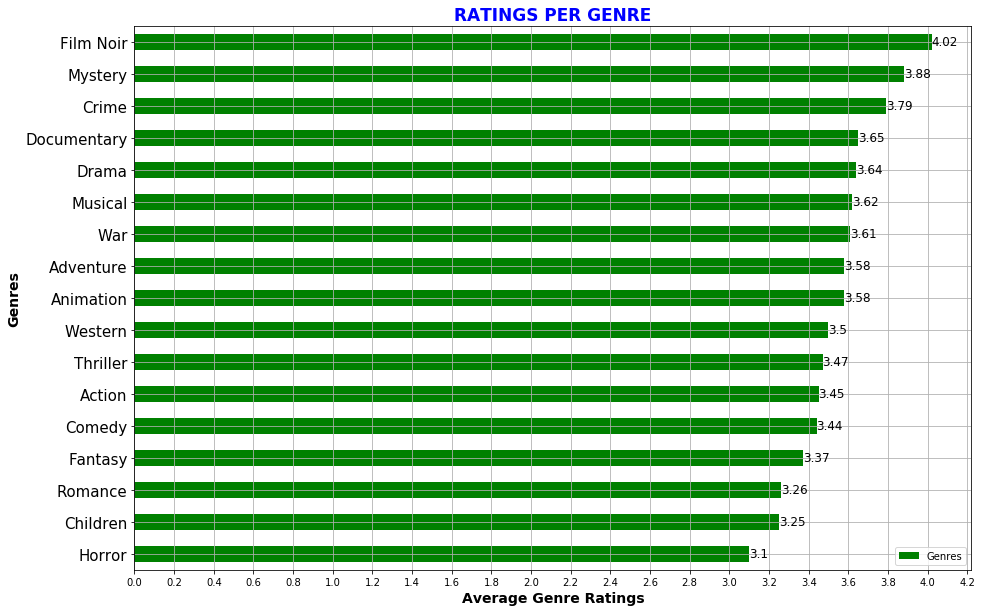

In [66]:
plt.rcParams['figure.figsize'] =(15,10)
ratings.plot.barh(color='green')

plt.title('RATINGS PER GENRE',fontweight='bold',fontsize=17,color='blue')


ax = plt.gca()
plt.xticks(np.arange(0,4.4,0.2))
plt.ylabel('Genres',fontweight='bold', color='black',fontsize=14)
plt.xlabel('Average Genre Ratings',fontweight='bold', color='black',fontsize=14 )

ys=[3.10,3.25,3.26,3.37,3.44,3.45,3.47,3.50,3.58,3.58,3.61,3.62,3.64,3.65,3.79,3.88,4.02,]
for i,v in enumerate (ys):
    ax.text(v,i-.1, str(v), fontsize =12)

plt.rc('ytick', labelsize=14)
plt.grid()

plt.legend(['Genres'], loc=4)
plt.savefig('ratings_per_genre.png')